In [32]:
library(tidyverse)
options(repr.plot.width=4, repr.plot.height=4)

In [33]:
Pegada = c(29.7, 29.7, 31.4, 31.8, 27.6)
Altura = c(175.3, 177.8, 185.4, 175.3, 172.7)

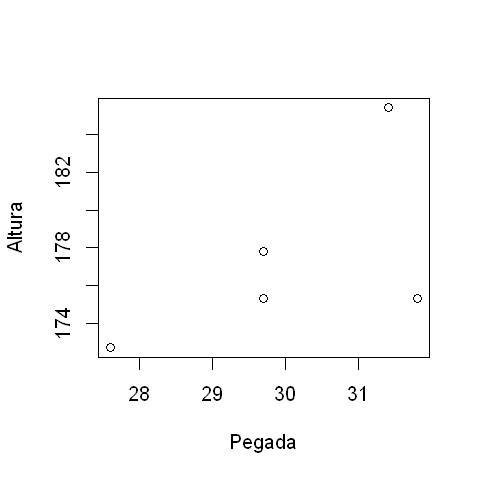

In [36]:
plot(Altura ~ Pegada)

### Passo a passo da regressão linear

In [41]:
tab = data.frame(Y = Altura, X = Pegada)
mY = mean(tab$Y)
mX = mean(tab$X)
mY
mX

[1] 177.3

[1] 30.04

In [46]:
tab$dY = tab$Y - mY
tab$dX = tab$X - mX
tab$dX2 = tab$dX^2
tab$dYX = tab$dY * tab$dX
tab

Y,X,dY,dX,dX2,dYX
175.3,29.7,-2.0,-0.34,0.1156,0.680
177.8,29.7,0.5,-0.34,0.1156,-0.170
185.4,31.4,8.1,1.36,1.8496,11.016
175.3,31.8,-2.0,1.76,3.0976,-3.520
172.7,27.6,-4.6,-2.44,5.9536,11.224


#### Estimador de $\beta_1$

In [49]:
SQYX = sum(tab$dYX)
SQYX
SQX

[1] 19.23

[1] 11.132

In [50]:
b1 = SQYX / SQX
b1

[1] 1.727452

#### Estimador de $\beta_0$

In [51]:
b0 = mY - b1 * mX
b0

[1] 125.4073

### Estimador de $\sigma^2$

In [54]:
tab$fit = b0 + b1 * tab$X
tab$res = tab$Y - tab$fit
tab$res2 = tab$res^2
tab

Y,X,dY,dX,dX2,dYX,fit,res,res2
175.3,29.7,-2.0,-0.34,0.1156,0.680,176.7127,-1.4126662,1.9956258
177.8,29.7,0.5,-0.34,0.1156,-0.170,176.7127,1.0873338,1.1822948
185.4,31.4,8.1,1.36,1.8496,11.016,179.6493,5.7506648,33.0701451
175.3,31.8,-2.0,1.76,3.0976,-3.520,180.3403,-5.0403162,25.4047875
172.7,27.6,-4.6,-2.44,5.9536,11.224,173.0850,-0.3850162,0.1482375


In [57]:
SQRes = sum(tab$res2)
n = nrow(tab)
s2 = SQRes / (n - 2)
s2

[1] 20.60036

### Teste de hipótese sobre $\beta_1$

In [65]:
epb1 = sqrt(s2/SQX)
epb1
tc = b1 / epb1
tc

[1] 1.360351

[1] 1.269858

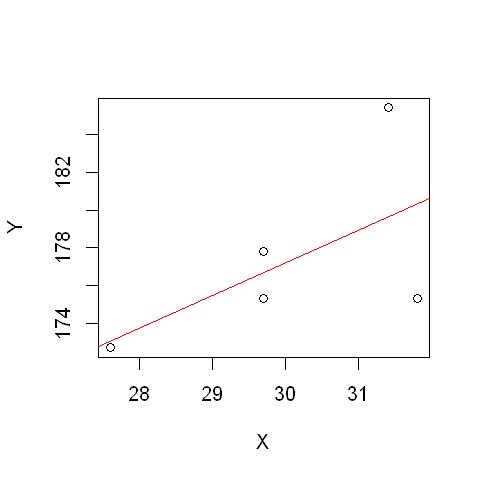

In [61]:
plot(Y ~ X, data = tab)
abline(a = b0, b = b1, col = 2)

### Regressão Linear no R

In [62]:
mr = lm(Y ~ X, data = tab)
mr


Call:
lm(formula = Y ~ X, data = tab)

Coefficients:
(Intercept)            X  
    125.407        1.727  


In [63]:
anova(mr)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,33.21891,33.21891,1.61254,0.2936863
Residuals,3,61.80109,20.60036,NA,NA


In [64]:
summary(mr)


Call:
lm(formula = Y ~ X, data = tab)

Residuals:
     1      2      3      4      5 
-1.413  1.087  5.751 -5.040 -0.385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  125.407     40.915   3.065   0.0548 .
X              1.727      1.360   1.270   0.2937  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.539 on 3 degrees of freedom
Multiple R-squared:  0.3496,	Adjusted R-squared:  0.1328 
F-statistic: 1.613 on 1 and 3 DF,  p-value: 0.2937
